# Visualize seed genes

In [31]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, SEED_SETS
from functions import split_seed_id, load_seed_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read data

In [35]:
df = load_seed_stats()
seeds_meta_df = pd.DataFrame.from_dict(SEED_SETS)
print(df.to_string())

                                                   Seed file  Seeds  Not in network  Seeds total seed_id                                           network_id
0                    UC.hippie.v2_3_medium_confidence.Symbol     74               2           76      UC                 hippie.v2_3_medium_confidence.Symbol
1     HD.nedrex.reviewed_proteins_exp_high_confidence.Symbol     34               6           40      HD  nedrex.reviewed_proteins_exp_high_confidence.Symbol
2       LUAD.string.human_physical_links_v12_0_min700.Symbol    223              57          280    LUAD      string.human_physical_links_v12_0_min700.Symbol
3                  LUAD.hippie.v2_3_medium_confidence.Symbol    263              17          280    LUAD                 hippie.v2_3_medium_confidence.Symbol
4                LUAD.string.human_links_v12_0_min700.Symbol    262              18          280    LUAD               string.human_links_v12_0_min700.Symbol
5         HD.string.human_physical_links_v12_0_min90

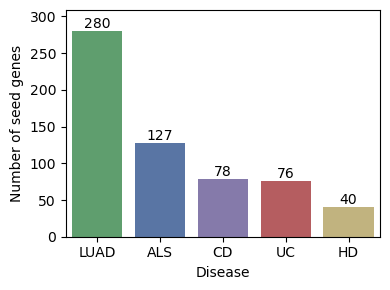

In [36]:
seed_sets_df = df[["seed_id", "Seeds total"]].drop_duplicates().sort_values(by="Seeds total", ascending=False)
# Create bar plot
plt.figure(figsize=(4, 3))
ax = sns.barplot(data=seed_sets_df, x='seed_id', y='Seeds total', hue="seed_id", palette=dict(zip(seeds_meta_df.short, seeds_meta_df.color)))

# Add value annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # You can format as needed
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10,
        xytext=(0, 0), textcoords='offset points',
    )
ax.set_ylim(top=ax.get_ylim()[1] * 1.05)  # Increase y-axis limit by 5%

# Add labels and title
plt.ylabel('Number of seed genes')
plt.xlabel('Disease')
plt.tight_layout()
plt.show()